In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
from nltk.corpus import stopwords


In [4]:
data = pd.read_csv('Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [8]:
data.isnull().sum()
data.dropna(inplace=True)

In [9]:
data["Sentiment"].value_counts()

Sentiment
1    5000
2    5000
3    5000
4    5000
5    4999
Name: count, dtype: int64

In [10]:
data.loc[data["Sentiment"] <= 3, "Sentiment"] = 0
data.loc[data["Sentiment"] > 3, "Sentiment"] = 1

In [11]:
##stopwords remove
stp_words = stopwords.words('english')
def clean_reviews(text):
    cleanreview = " ".join(word for word in text.split()
                            if word not in stp_words)
    return cleanreview

data["Review"] = data["Review"].apply(clean_reviews)
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


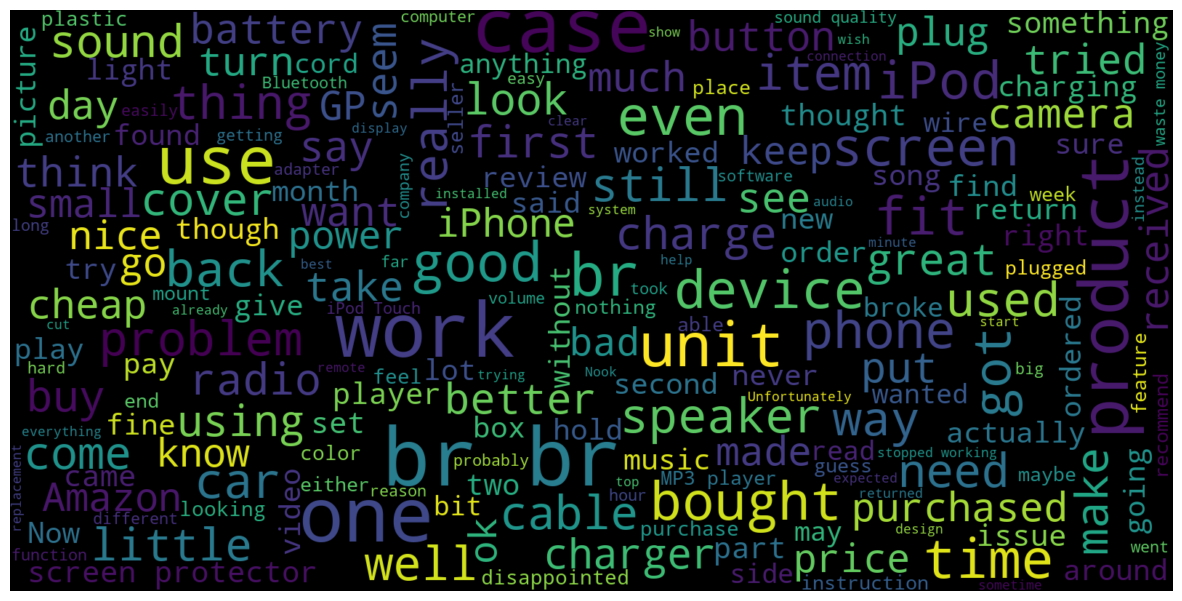

In [12]:
##wordcloud for knowing the importance of the words 
##sentiment = 0 
consolidated = " ".join(word for word in data["Review"]
                        [data["Sentiment"] == 0].astype(str))
wordcloud = WordCloud(width=1600, height=800,
                      random_state=21,
                      max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.generate(consolidated),
           interpolation="bilinear")
plt.axis("off")
plt.show()

In [13]:
##converting text into vectors 
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data["Review"]).toarray()

In [14]:
#train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data["Sentiment"],
                                                    test_size=0.25,
                                                    random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [16]:
model.score(X_test, y_test)

0.81424

In [17]:
model.score(X_train, y_train)

0.8532721745159741

In [18]:
##make a dataframe for confusion matrix 
df = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df.head()

,Actual,Predicted
6868,0,1
19677,1,1
9668,0,0
13640,0,1
14018,0,1
